##  Programming Exercise: Logistic Regression

In this exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

### 1. Loading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/PS 2 Logistic Regression/exams_data-1.txt', header=None)
df.columns = ['exam_score_1', 'exam_score_2', 'admitted']
df.head()

,exam_score_1,exam_score_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# Initialize some useful values

m = df.shape[0] # number of training samples
X = np.hstack((np.ones((m, 1)), df[['exam_score_1', 'exam_score_2']].values))
y = np.array(df['admitted'].values)

### 2. Visualizing the Data

In [4]:
def plot_data(X, y):
    """ Plots the data points X and y with + for the positive examples and . for the negative examples.
        X is assumed to be a mx3 matrix.
    """
    pos = y == 1
    neg = y == 0
    plt.scatter(X[pos, 1], X[pos, 2], marker='+', c='blue', label='Admitted')
    plt.scatter(X[neg, 1], X[neg, 2], marker='.', c='red', label='Not admitted')
    plt.xlabel('Exam Score 1')
    plt.ylabel('Exam Score 2')

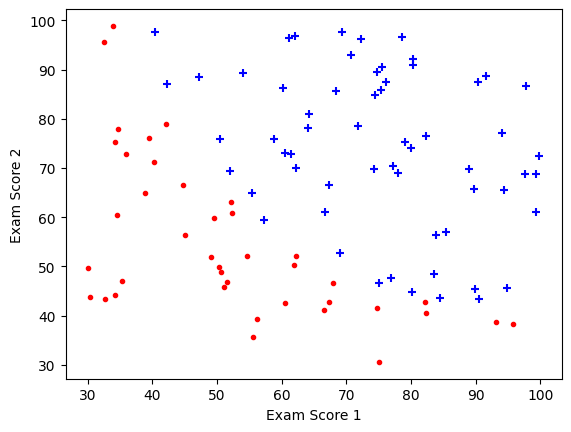

In [5]:
plot_data(X, y)

### 3. Model Implementation

Logistic regression hypothesis:

$$h_\theta(x) = g(\theta^Tx)$$

$$g(z) = \frac{1}{1+e^{-z}}$$

#### 3.1 Sigmoid function

In [10]:
def sigmoid(z):
    """ g = sigmoid(z) computes the sigmoid of z (z can be a scalar, vector or a matrix).
    """
    z = np.array(z)
    return 1 / (1 + np.exp(-z))

In [11]:
sigmoid([0, 0.1, 0.5, 0.9, 1])

array([0.5       , 0.52497919, 0.62245933, 0.7109495 , 0.73105858])

#### 3.2 Cost function and gradient

Cost function in logistic regression is:

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^i log(h_\theta(x^i))+(1-y^i)log(1-h_\theta(x^i))]$$

Vectorized implementation:

$h = g(X\theta)$

$J(\theta) = \frac{1}{m}(-y^T log(h)-(1-y)^Tlog(1-h))$



The gradient of the cost is a vector of the same length as $\theta$ where $j^{th}$ element (for $j=0,1,...,n$) is defined as follows:

$$\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^m ((h_\theta(x^i) - y^i) \cdot x_j^i)$$

Vectorized:
$\nabla J(\theta) = \frac{1}{m} \cdot X^T \cdot (g(X\theta)-y)$

In [12]:
# Compute cost and gradient for logistic regression
def cost_function(theta, X, y):
    """ J, grad = cost_function(theta, X, y) computes the cost of using theta as the parameter
        for logistic regression and the gradient of the cost w.r.t. to the parameters.
    """

    # You need to return the following variables correctly
    J = 0
    grad = np.zeros(len(theta))

    # ====================== YOUR CODE HERE ====================================
    # Instructions: Compute the cost of a particular choice of theta.
    #               You should set J to the cost.
    #               Compute the partial derivatives and set grad to the partial
    #               derivatives of the cost w.r.t. each parameter in theta
    #
    # Note: grad should have the same dimensions as theta
    #
    # DIMENSIONS:
    #   theta = (n+1) x 1
    #   X     = m x (n+1)
    #   y     = m x 1
    #   grad  = (n+1) x 1
    #   J     = Scalar







    # =========================================================================
    m = y.size  # number of training samples
    h = sigmoid(np.dot(X, theta))
    J = (-1 / m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    grad = (1 / m) * np.dot(X.T, (h - y))
    return J, grad

In [13]:
initial_theta = np.zeros(shape=(X.shape[1]))
cost, grad = cost_function(initial_theta, X, y)

print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros): 0.6931471805599453
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


#### 3.3 Learning parameters using an optimization solver

"Conjugate gradient", "BFGS", and "TNC (Truncated Newton)" are more sophisticated, faster ways to optimize
 that can be used instead of gradient descent.

In [14]:
import scipy.optimize as opt

def optimize_theta(X, y, initial_theta):
    opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',
                               jac=True, options={'maxiter':400})
    return opt_results['x'], opt_results['fun']

In [15]:
opt_theta, cost = optimize_theta(X, y, initial_theta)

<ipython-input-14-057875fbc25f>:4: OptimizeWarning: Unknown solver options: maxiter
  opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',


In [16]:
print('Cost at theta found by fminunc:', cost)
print('Expected cost (approx): 0.203')
print('theta:\n', opt_theta.reshape(-1,1))
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201')

Cost at theta found by fminunc: 0.20349770158947478
Expected cost (approx): 0.203
theta:
 [[-25.16131857]
 [  0.20623159]
 [  0.20147149]]
Expected theta (approx):
 -25.161
 0.206
 0.201


### 4. Evaluating the Model

In [17]:
prob = sigmoid(np.array([1, 45, 85]).dot(opt_theta))
print('For a student with scores 45 and 85, we predict an admission probability of', prob)
print('Expected value: 0.775 +/- 0.002')

For a student with scores 45 and 85, we predict an admission probability of 0.7762906222622858
Expected value: 0.775 +/- 0.002


#### 4.1 Accuracy on the training set

In [18]:
def predict(theta, X):
    """ Predict whether the label is 0 or 1 using learned logistic regression parameters theta
        y_pred = PREDICT(theta, X) computes the predictions for X using a threshold at 0.5
        (i.e., if sigmoid(X @ theta) >= 0.5, predict 1)
    """

    # You need to return the following variables correctly
    y_pred = np.zeros(m)

    # ====================== YOUR CODE HERE ===================================
    # Instructions: Complete the following code to make predictions using
    #               your learned logistic regression parameters.
    #               You should set p to a vector of 0's and 1's
    #
    # Dimentions:
    # X     =  m x (n+1)
    # theta = (n+1) x 1





    # =========================================================================
    prob = sigmoid(np.dot(X, theta))
    y_pred = (prob >= 0.5).astype(int)
    return y_pred

In [19]:
y_pred = predict(opt_theta, X)
print(f'Train accuracy: {np.mean(y_pred == y) * 100}%')

Train accuracy: 89.0%


#### 4.2 Decision boundary

In [21]:
def plot_data_with_decision_boundary(theta, X, y):
    """ Plots the training data with the decision boundary
    """

    # ====================== YOUR CODE HERE ===================================








    # =========================================================================
    plt.figure(figsize=(8, 6))
    pos = (y == 1)
    neg = (y == 0)
    plt.scatter(X[pos, 1], X[pos, 2], marker='+', color='b', label='Admitted')
    plt.scatter(X[neg, 1], X[neg, 2], marker='o', color='r', label='Not admitted')
    x1_vals = np.linspace(X[:,1].min(), X[:,1].max(), 100)

    x2_vals = -(theta[0] + theta[1] * x1_vals) / theta[2]
    plt.plot(x1_vals, x2_vals, 'g-', label='Decision Boundary')


    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.title('Training Data with Decision Boundary')
    plt.legend()
    plt.show()


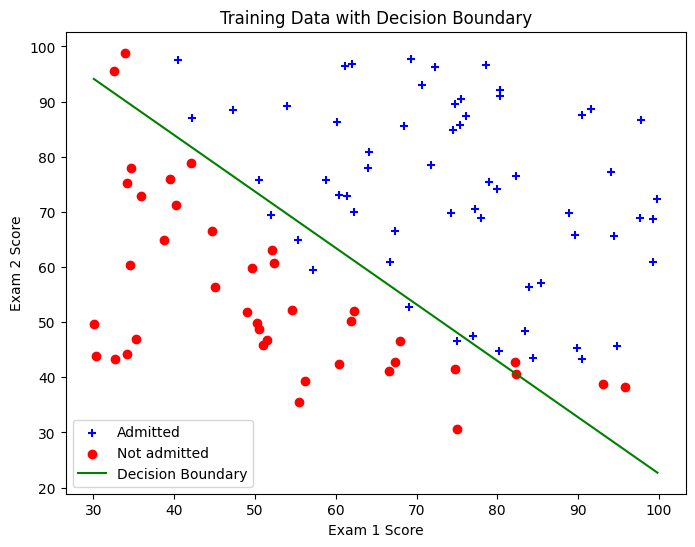

In [22]:
plot_data_with_decision_boundary(opt_theta, X, y)